<a href="https://colab.research.google.com/github/MonojBikashSarker/INSE-6220_Project/blob/main/Inse_6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
from pycaret.utils import version
version()

'3.0.0'

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [99]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [144]:
df = pd.read_csv('https://raw.githubusercontent.com/MonojBikashSarker/INSE-6220_Project/main/Contract_Renewal.csv')
df.head(25)

ID  Registration_Duration  Revenue      Cost  Renewal
0   10001                     29       46   8.33316        1
1   10002                     58      105  18.24564        1
2   10003                     36       55   3.13296        1
3   10004                     32       28   9.96705        1
4   10005                     26       32   7.19040        0
5   10006                     37       40   4.43194        0
6   10007                     27       40   4.83854        0
7   10008                     26       32   4.62240        1
8   10009                     59      172  10.11150        1
9   10010                     22       24   0.95979        1
10  10011                     56       87  17.97600        1
11  10012                     32       41   4.42338        0
12  10013                     40      130  25.34188        1
13  10014                     19       37   1.46055        1
14  10015                     48       37   5.83471        1
15  10016                     19       16   1.18770        0
16  10017                     19       59   9.40744        0
17  10018                     20       33   0.51360        0
18  10019                     20       27   1.61356        0
19  10020                     51      114  11.36875        1
20  10021                     22       42   3.25280        0
21  10022                     26       39   3.28597        1
22  10023                     43       39   2.80661        1
23  10024                     36       94  14.65793        0
24  10025                     37       51   2.03728        1

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1500 non-null   int64  
 1   Registration_Duration  1500 non-null   int64  
 2   Revenue                1500 non-null   int64  
 3   Cost                   1500 non-null   float64
 4   Renewal                1500 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 58.7 KB


In [102]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [103]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


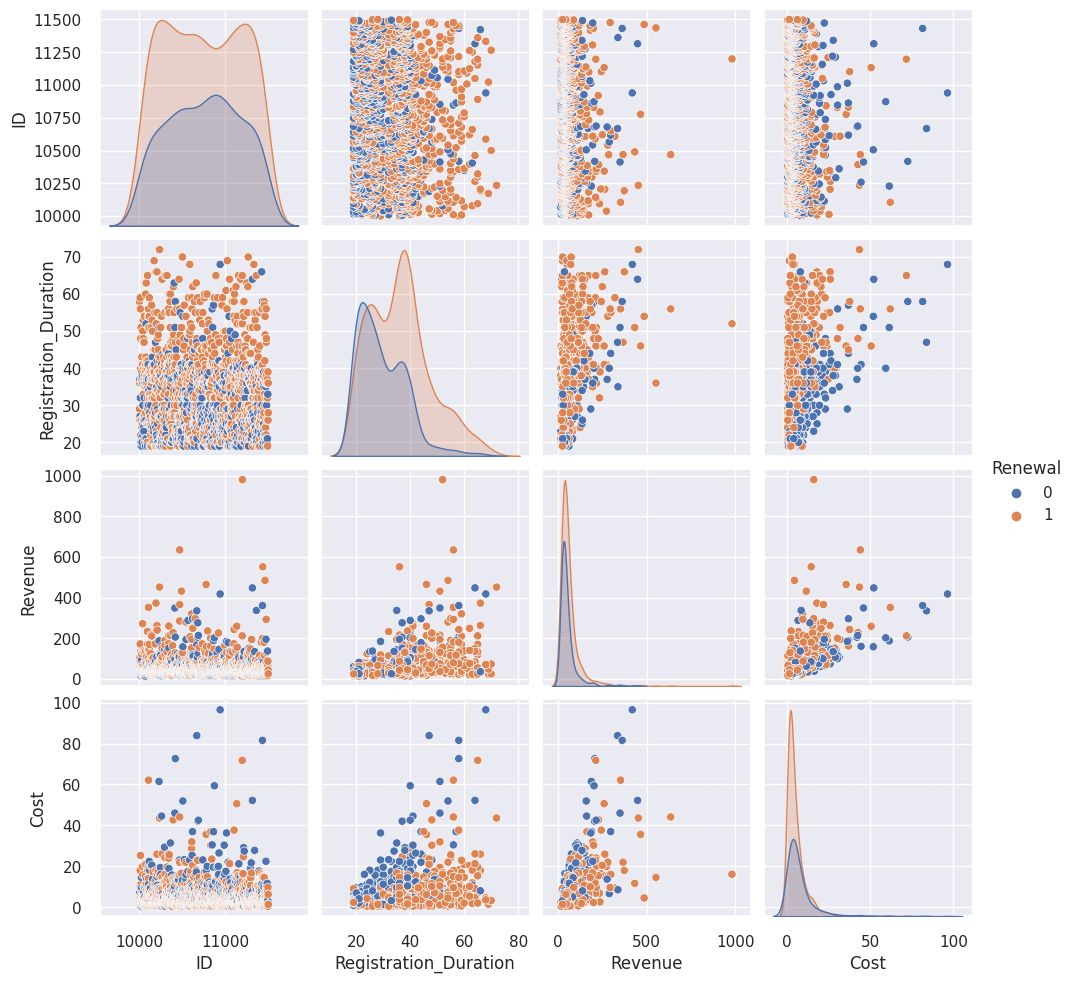

In [104]:
sns.pairplot(df, hue='Renewal')
plt.show()

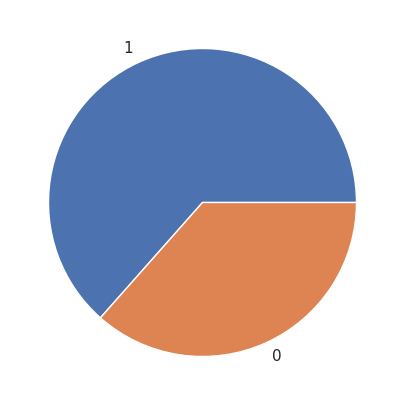

In [105]:
y =df['Renewal']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [106]:
X = df.drop(columns=['Renewal'])
X.head(10)

ID  Registration_Duration  Revenue      Cost
0  10001                     29       46   8.33316
1  10002                     58      105  18.24564
2  10003                     36       55   3.13296
3  10004                     32       28   9.96705
4  10005                     26       32   7.19040
5  10006                     37       40   4.43194
6  10007                     27       40   4.83854
7  10008                     26       32   4.62240
8  10009                     59      172  10.11150
9  10010                     22       24   0.95979

In [107]:
X.describe().transpose()

count          mean         std         min  \
ID                     1500.0  10750.500000  433.157015  10001.0000   
Registration_Duration  1500.0     33.756000   10.928133     19.0000   
Revenue                1500.0     58.387333   61.862056     13.0000   
Cost                   1500.0      6.191050    8.206847      0.5136   

                               25%           50%           75%         max  
ID                     10375.75000  10750.500000  11125.250000  11500.0000  
Registration_Duration     25.00000     33.000000     40.000000     72.0000  
Revenue                   28.00000     40.000000     64.000000    981.0000  
Cost                       1.82114      3.735905      7.245237     96.4712

In [108]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

ID  Registration_Duration   Revenue      Cost
0 -1.730896              -0.435352 -0.200308  0.261102
1 -1.728587               2.219234  0.753745  1.469335
2 -1.726278               0.205410 -0.054774 -0.372751
3 -1.723968              -0.160740 -0.491375  0.460257
4 -1.721659              -0.709965 -0.426693  0.121811
5 -1.719349               0.296948 -0.297330 -0.214418
6 -1.717040              -0.618427 -0.297330 -0.164858
7 -1.714731              -0.709965 -0.426693 -0.191203
8 -1.712421               2.310772  1.837161  0.477864
9 -1.710112              -1.076114 -0.556057 -0.637639

In [109]:
X.describe().transpose()

count          mean       std       min       25%  \
ID                     1500.0  0.000000e+00  1.000334 -1.730896 -0.865448   
Registration_Duration  1500.0 -2.368476e-17  1.000334 -1.350727 -0.801502   
Revenue                1500.0  3.315866e-17  1.000334 -0.733931 -0.491375   
Cost                   1500.0  4.736952e-18  1.000334 -0.692025 -0.532649   

                            50%       75%        max  
ID                     0.000000  0.865448   1.730896  
Registration_Duration -0.069202  0.571560   3.500759  
Revenue               -0.297330  0.090759  14.919006  
Cost                  -0.299258  0.128495  11.004257

In [110]:
observations = list(df.index)
variables = list(df.columns)

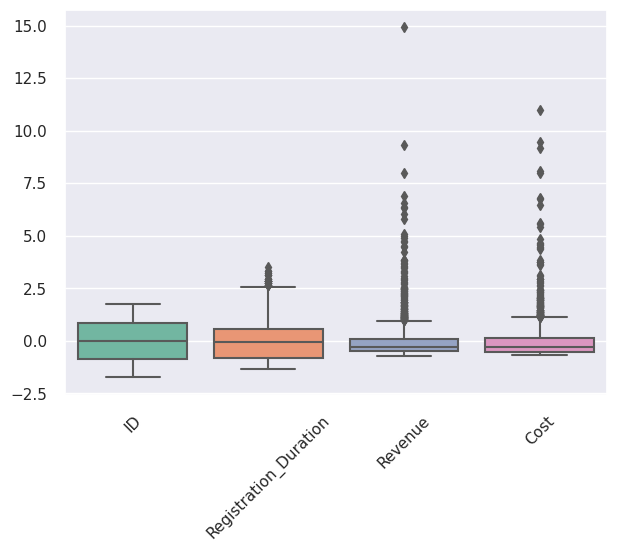

In [111]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

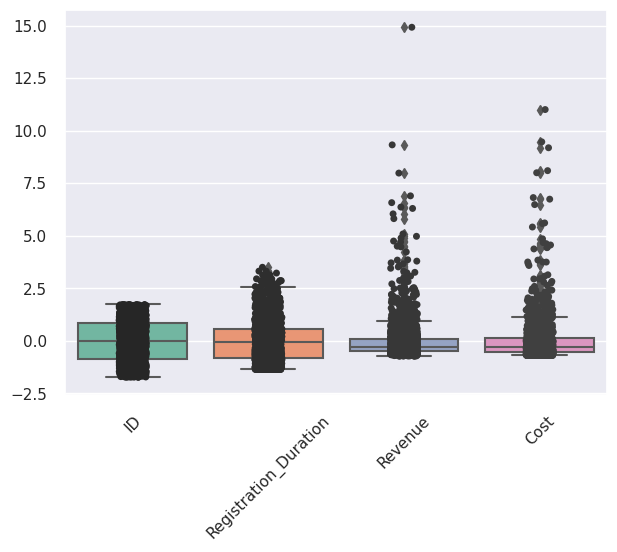

In [112]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

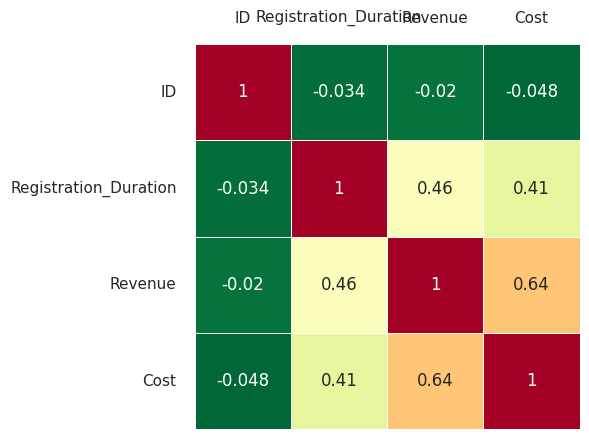

In [113]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

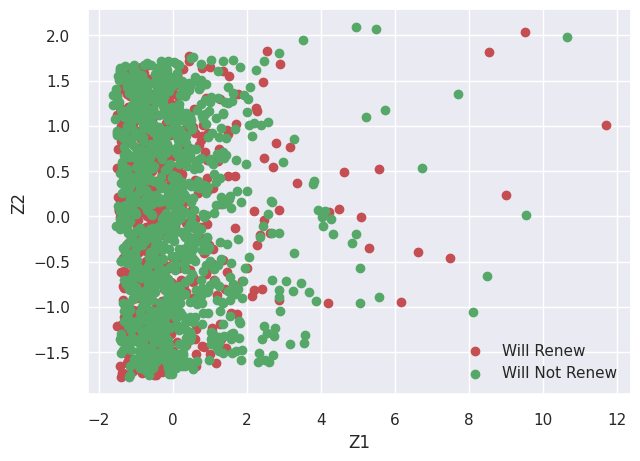

In [114]:
pca = PCA()
Z = pca.fit_transform(X)

idx_renew = np.where(y == 0)
idx_notrenew = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_renew,0], Z[idx_renew,1], c='r', label='Will Renew')
plt.scatter(Z[idx_notrenew,0], Z[idx_notrenew,1], c='g', label='Will Not Renew')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

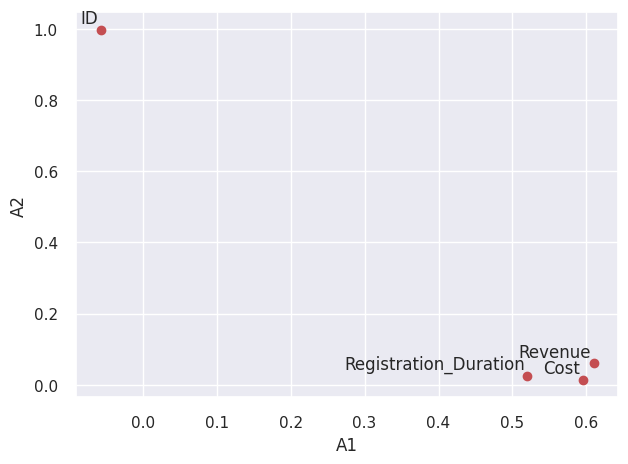

In [115]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

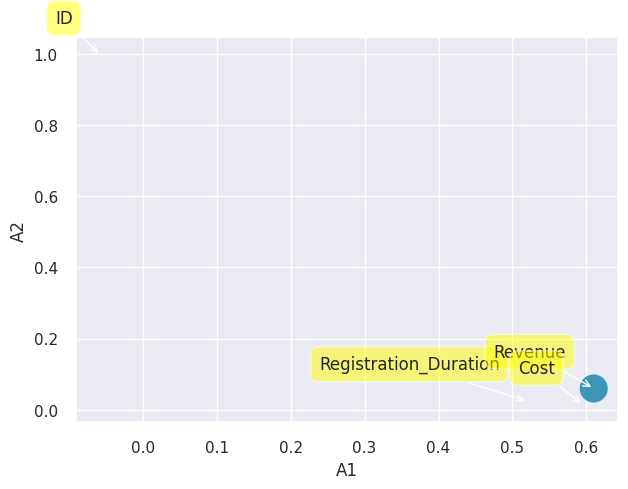

In [116]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

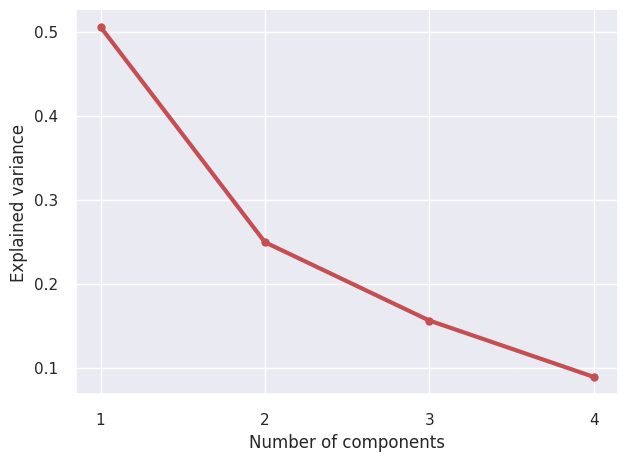

In [117]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Text(0, 0.5, 'Cumulative explained variance')

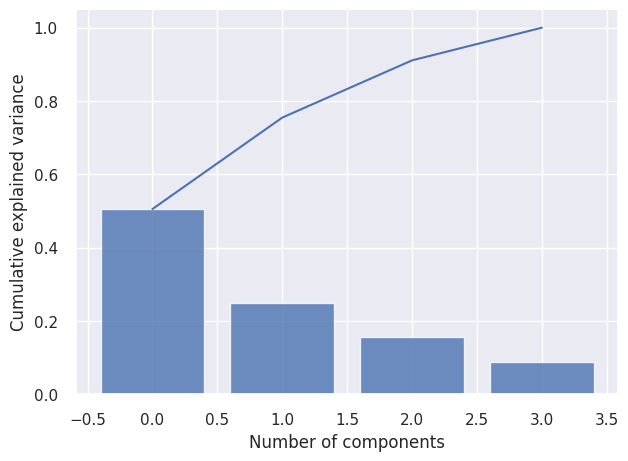

In [118]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.8)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

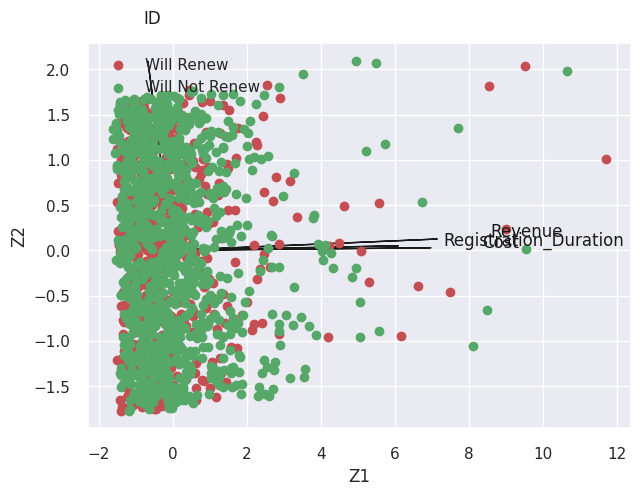

In [119]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_renew,0], Z[idx_renew,1], c='r', label='Will Renew')
plt.scatter(Z[idx_notrenew,0], Z[idx_notrenew,1], c='g', label='Will Not Renew')
plt.legend(loc='upper left')

In [120]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [122]:
out['PC']

PC1       PC2       PC3       PC4
0    -0.094376 -1.746006  0.433409 -0.220327
1     2.587391 -1.606582 -1.002480 -0.599523
2    -0.049737 -1.725950 -0.351634  0.243202
3    -0.010901 -1.747184  0.206636 -0.596422
4    -0.458726 -1.758796  0.539024 -0.265940
...        ...       ...       ...       ...
1495  0.550211  1.756429  0.148500 -0.027492
1496 -0.309723  1.711299 -0.720894  0.103470
1497 -1.285477  1.656166  0.097533 -0.016424
1498 -0.131305  1.715186 -0.240802 -0.274693
1499 -1.043302  1.674456  0.030736 -0.016873

[1500 rows x 4 columns]

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (50.5% expl.var)', ylabel='PC2 (24.9% expl.var)'>)

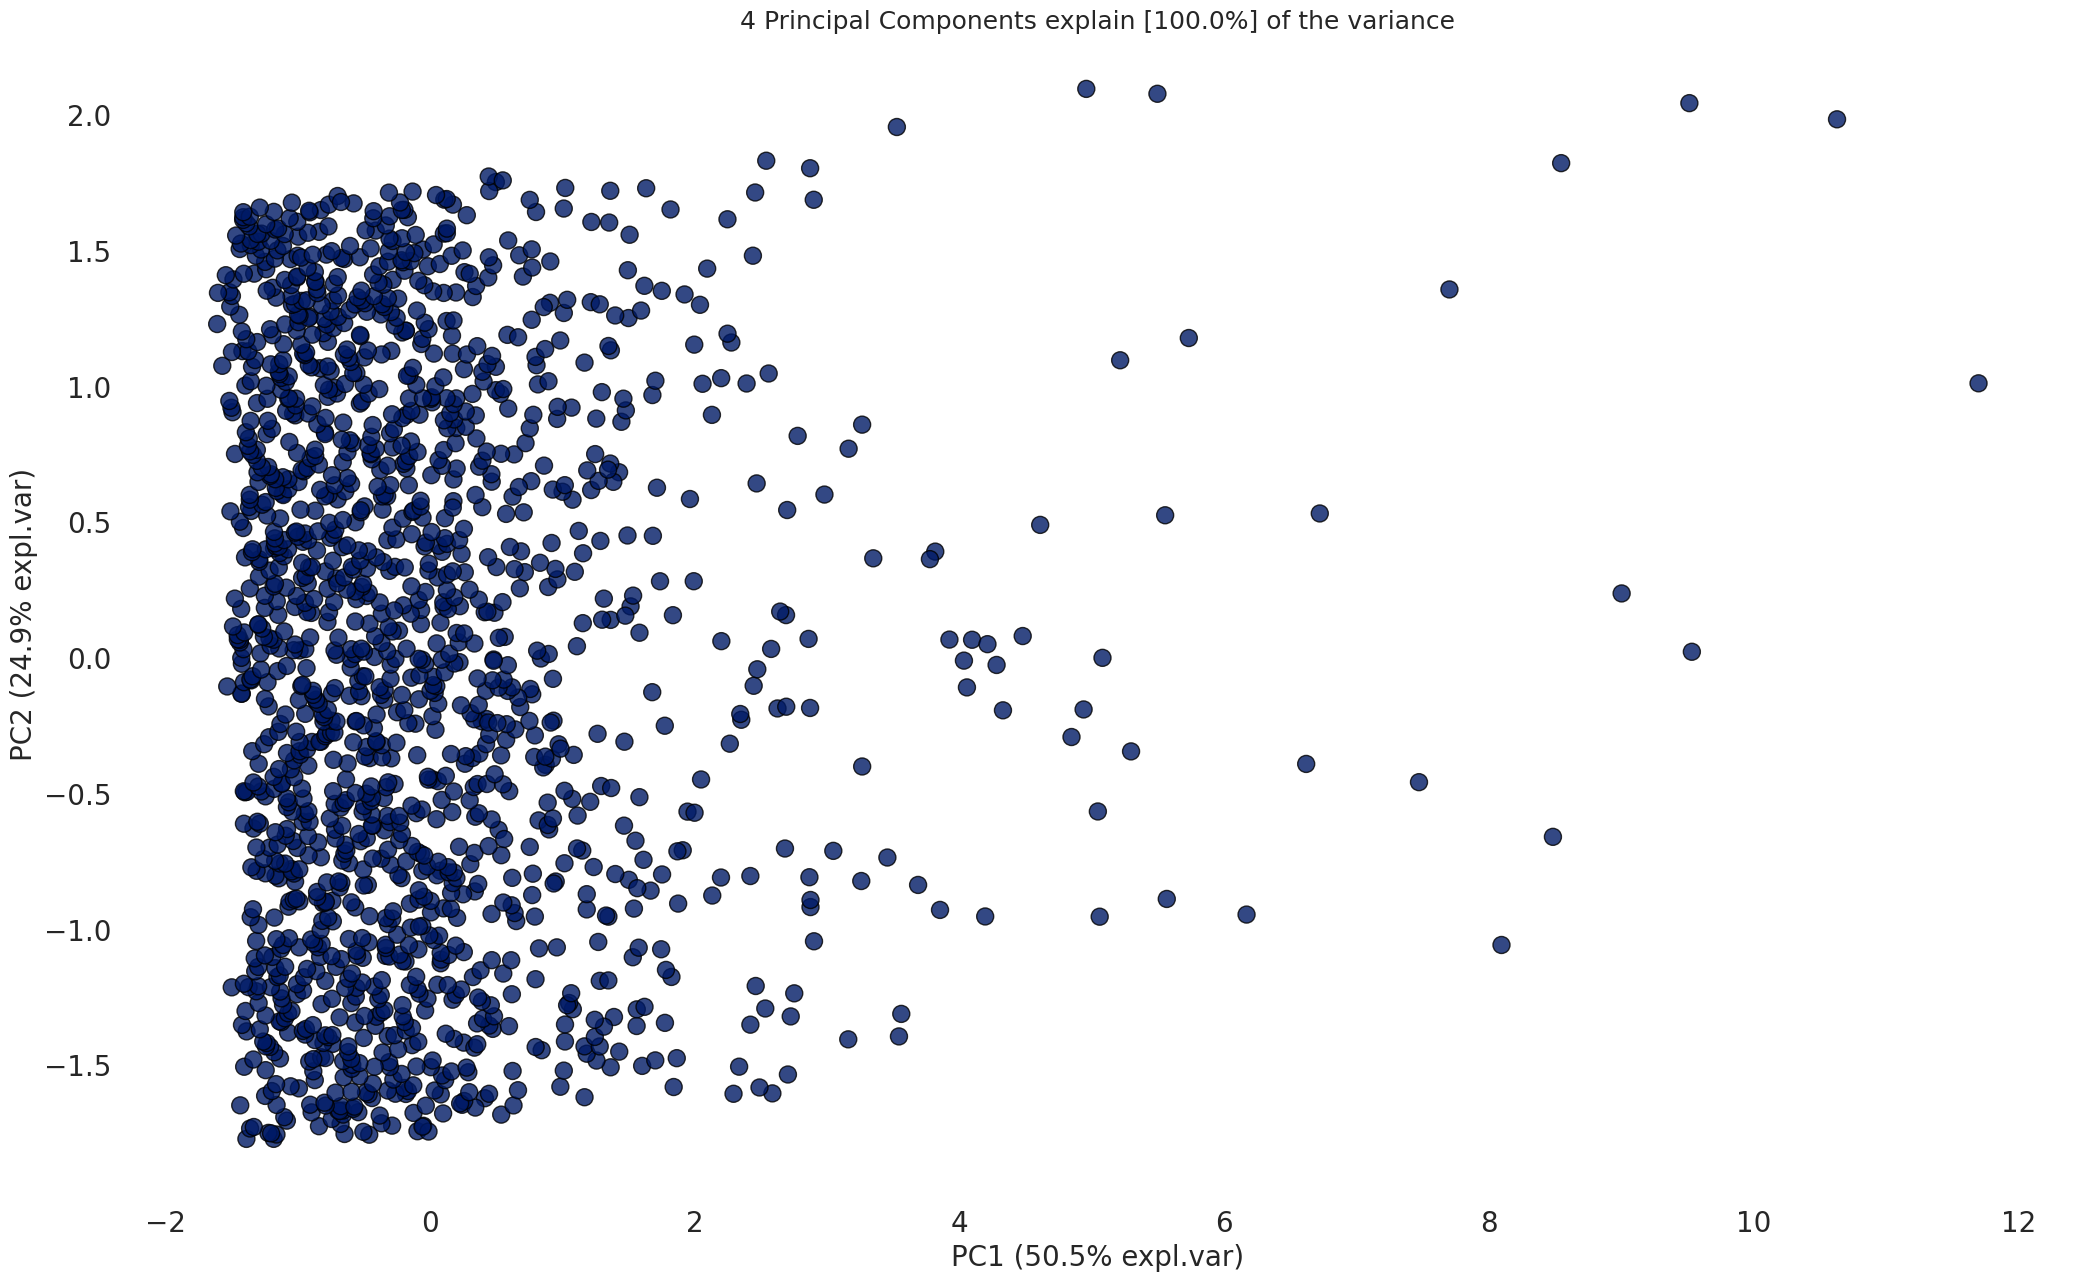

In [123]:
model.scatter(label=True, legend=False)

In [124]:
A = out['loadings'].T

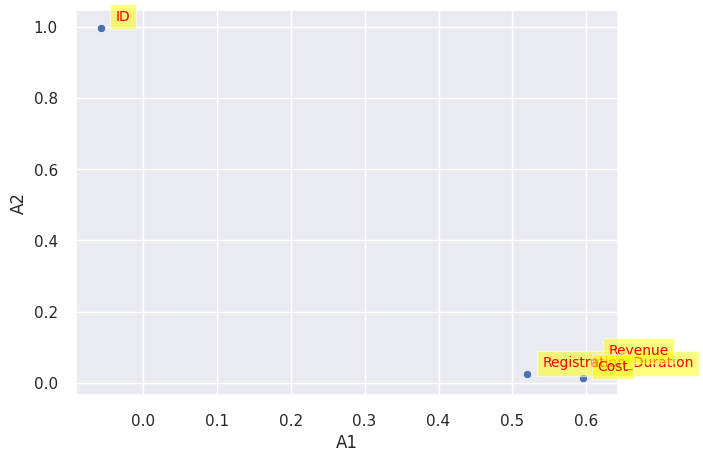

In [125]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

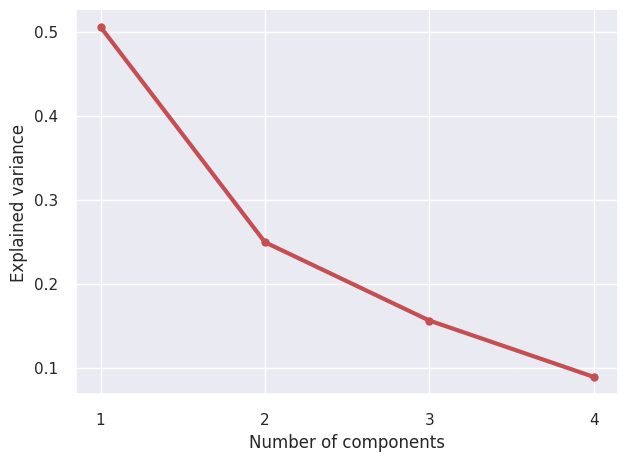

In [126]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

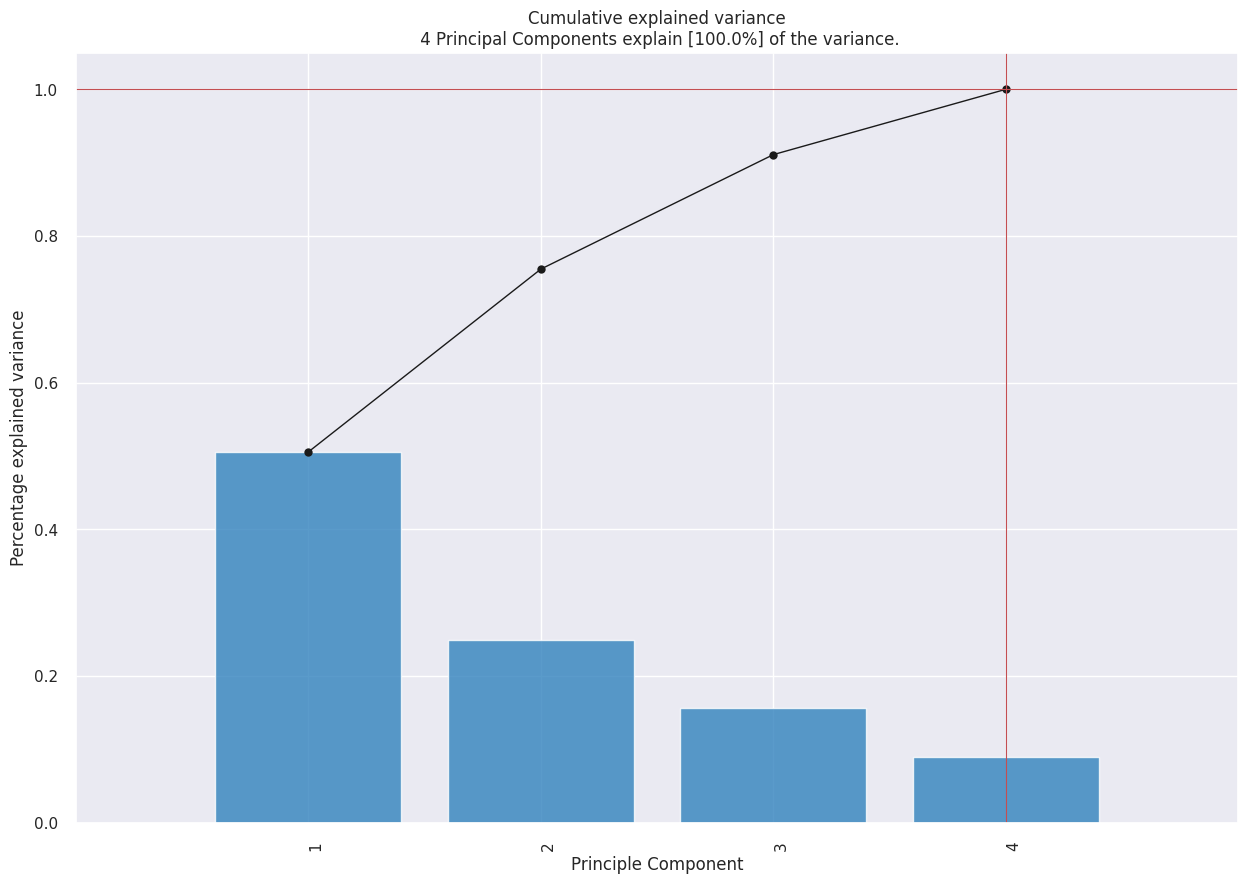

<Figure size 700x500 with 0 Axes>

In [127]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


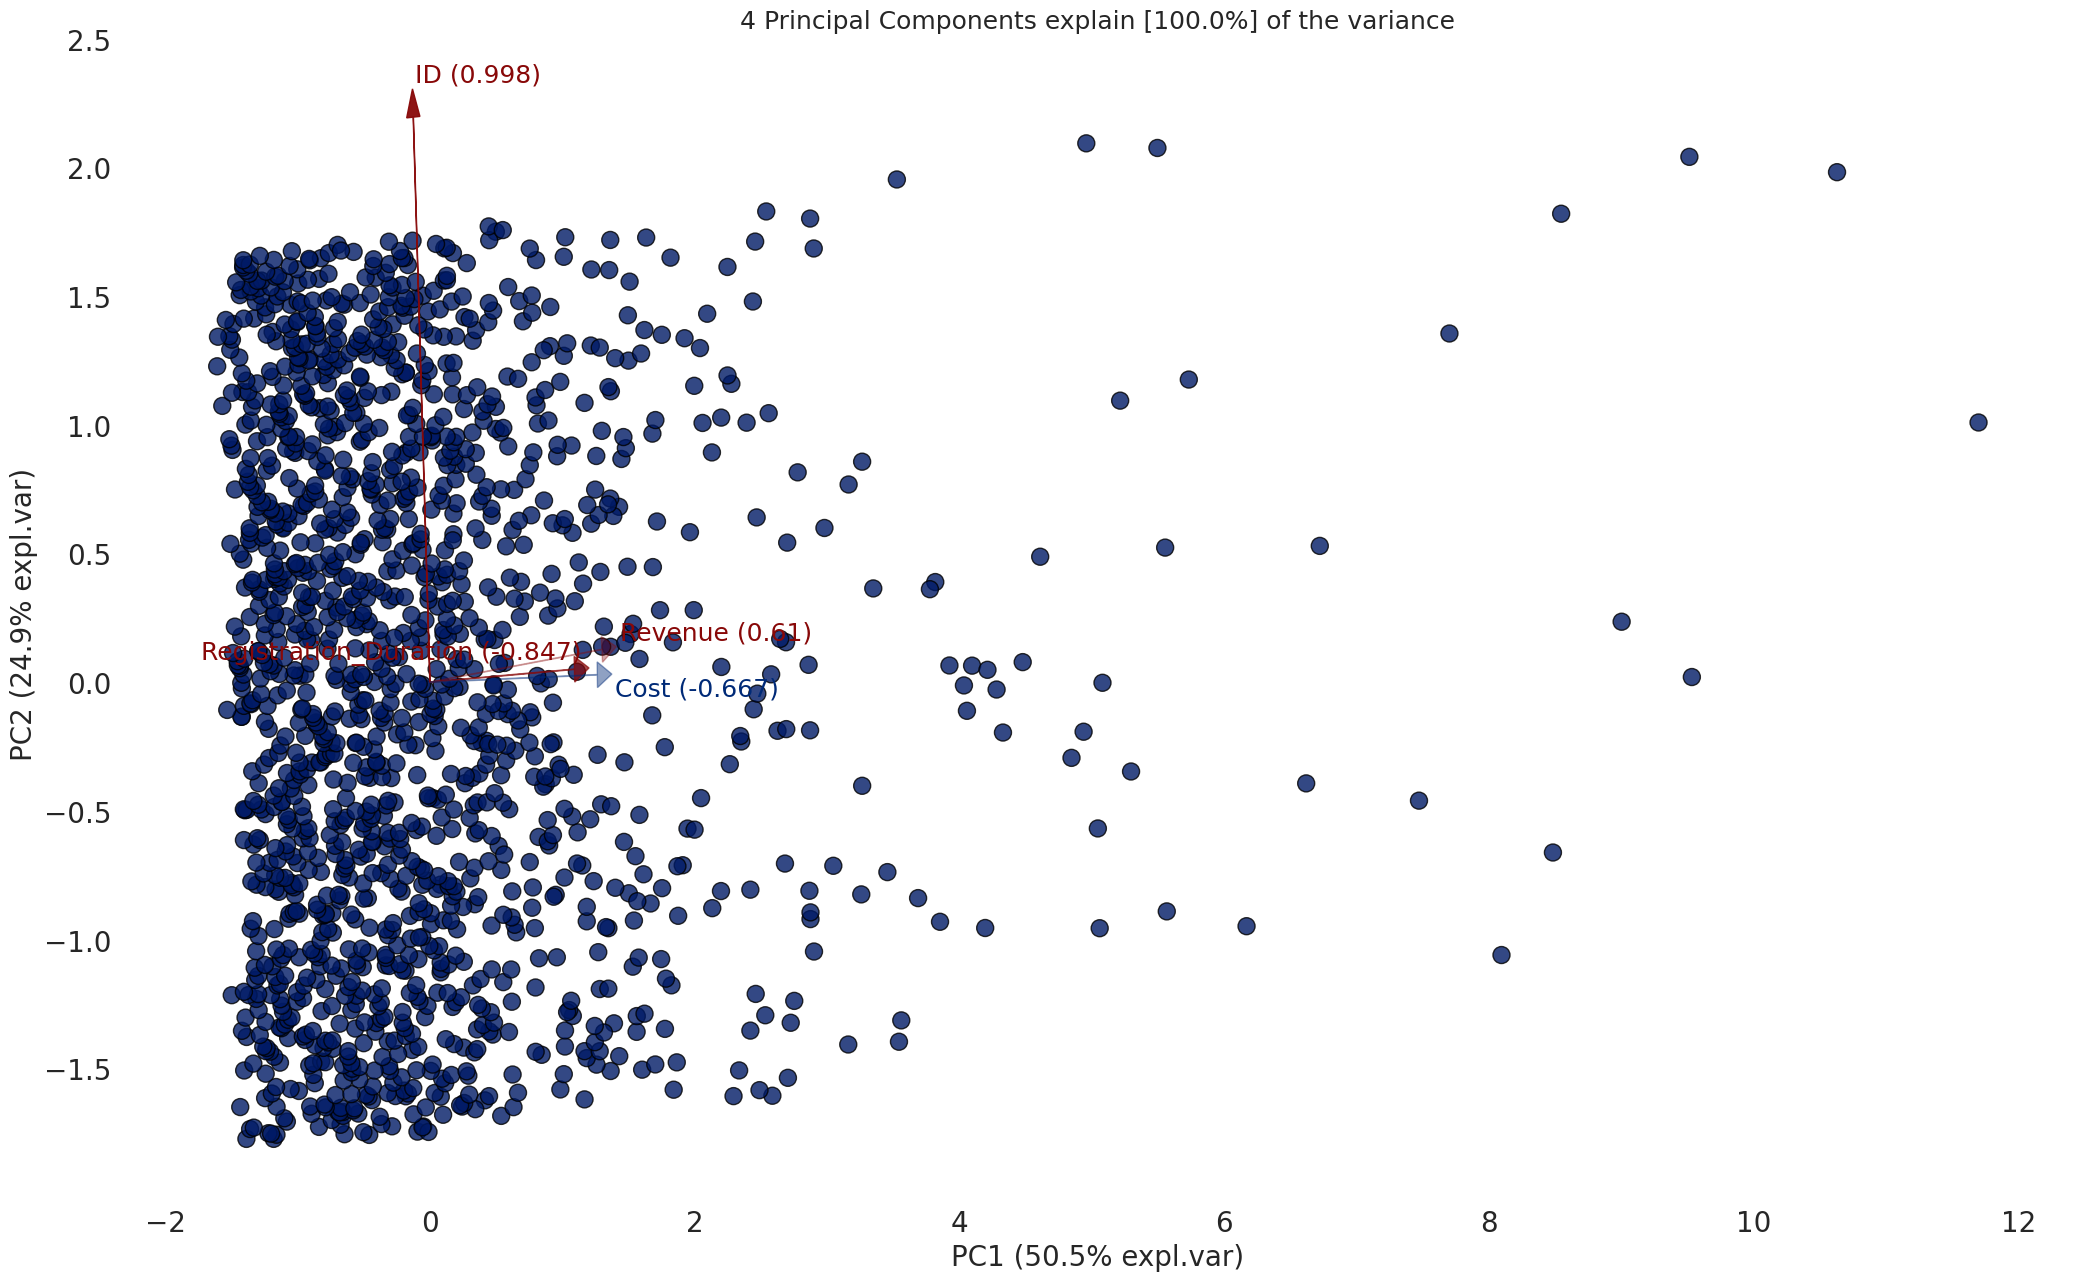

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (50.5% expl.var)', ylabel='PC2 (24.9% expl.var)'>)

In [128]:
model.biplot(label=False, legend=False)

In [129]:
from pycaret.classification import *
clf_pca = setup(data=df, target='Renewal', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [130]:

#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [131]:
best_model_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [132]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [133]:
tuned_best_model_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

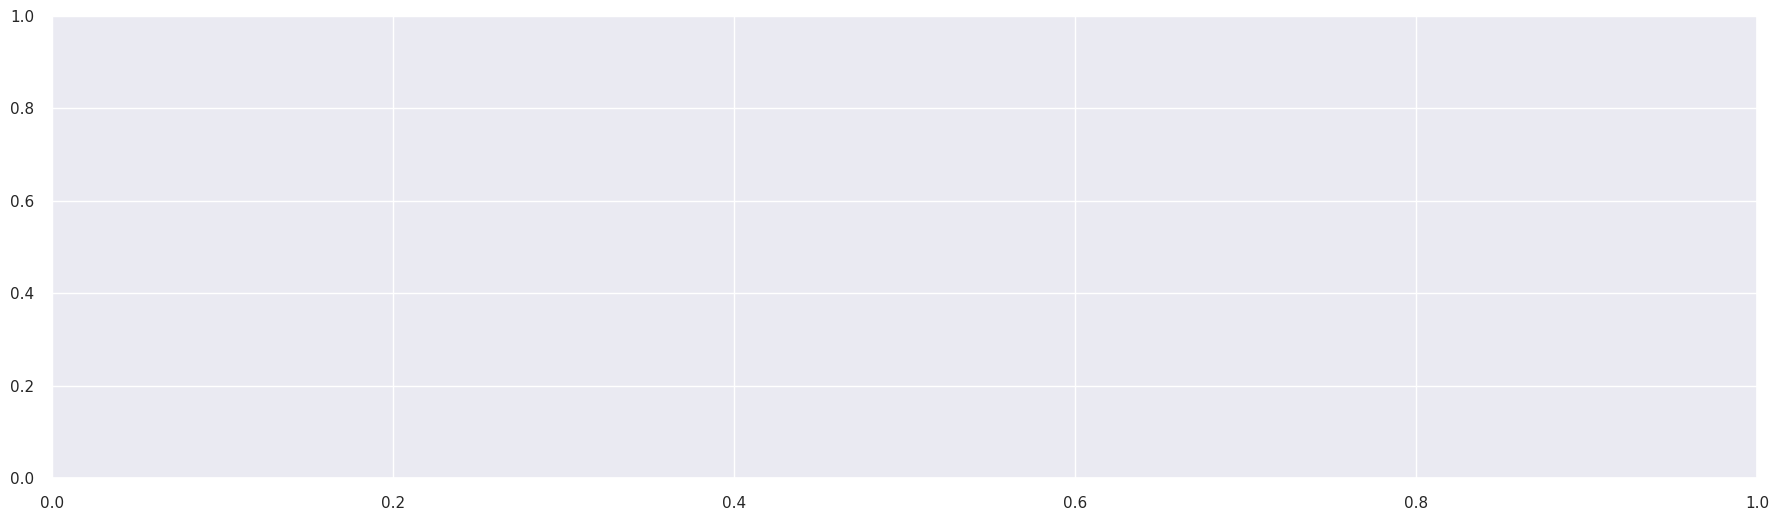

In [134]:
evaluate_model(tuned_best_model_pca)

In [135]:
!pip install pycaret[analysis]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [137]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


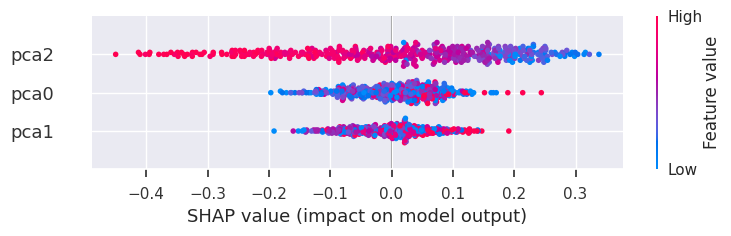

In [138]:
interpret_model(tuned_rf_pca, plot='summary')

In [139]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [140]:
interpret_model(tuned_rf_pca, plot='reason')